In [1]:
# 파이썬 ≥3.5
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import os
import numpy as np

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER = "filter"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
x_split = 1000
x_show = 4
# 1hz 10hz 100hz
h = (1, 5, 10, 20) # hz
HZ = [2*np.pi * i for i in h] # 2pi * hz
HZ

[6.283185307179586, 31.41592653589793, 62.83185307179586, 125.66370614359172]

그림 저장: HZ


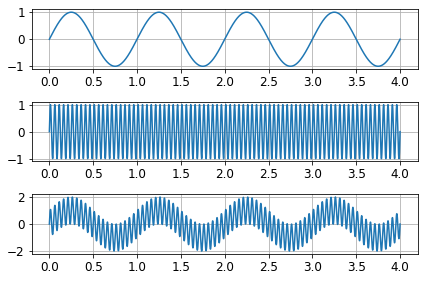

In [4]:
x = np.linspace(0,x_show, x_split * x_show)  # x범위 및 쪼개기
x_sin = { #sin파 생성
    "1Hz" : np.sin(x * HZ[0]),
    "5Hz" : np.sin(x * HZ[1]),
    "10Hz" : np.sin(x * HZ[2]),
    "20Hz" : np.sin(x * HZ[3]),
}

x_sum_120 = x_sin['1Hz'] + x_sin['20Hz']
plt.subplot(3,1,1)
plt.plot(x, x_sin['1Hz'])
plt.grid()
plt.subplot(3,1,2)
plt.plot(x, x_sin['20Hz'])
plt.grid()
plt.subplot(3,1,3)
plt.plot(x, x_sum_120)
plt.grid()
save_fig("HZ")

그림 저장: white Noise


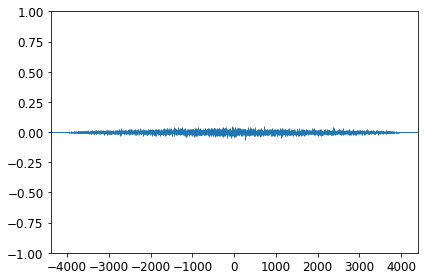

In [5]:
# Make White Noise
sampleA = np.random.randn(x_split * x_show)
sampleB = np.random.randn(x_split * x_show)

wn = list(plt.xcorr(sampleA, sampleB, usevlines=True, maxlags=x_split * x_show -1, normed=True, lw=1)[1][x_split * x_show-1:])
plt.ylim([-1,1])
save_fig("white Noise")

그림 저장: x_with_wn


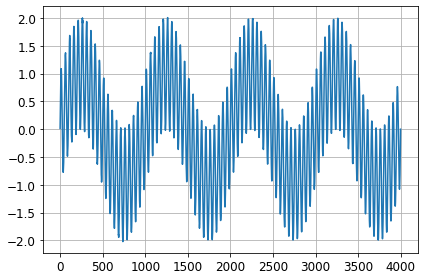

In [6]:
x_with_wn = x_sin['1Hz'] + x_sin['20Hz'] + wn
plt.grid()
plt.plot(x_with_wn)
save_fig("x_with_wn")

sampleA = np.random.randn(x_split * x_show)
x_with_wn = x_sin['1Hz'] + x_sin['20Hz'] + sampleA
plt.plot(x_with_wn)

C:\Users\sypark\anaconda3\envs\example2\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\sypark\anaconda3\envs\example2\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


그림 저장: X_f_notabs


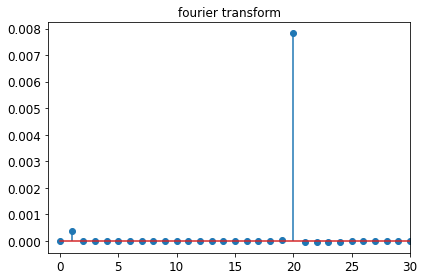

In [8]:
# Fourier transform
def Ck(k, data):
    c = [data[index]*np.exp(-1j * 2 * np.pi * k * index / x_split) for index in range(x_split)]
    return sum(c) / x_split

X_f = [Ck(k,x_sum_120) for k in range(x_split * x_show)]
X_f_abs = [abs(X_f[data]) for data in range(x_split * x_show)]
plt.title("fourier transform")
plt.xlim(-1,30)
plt.stem(X_f)
save_fig("X_f_notabs")

그림 저장: X_F


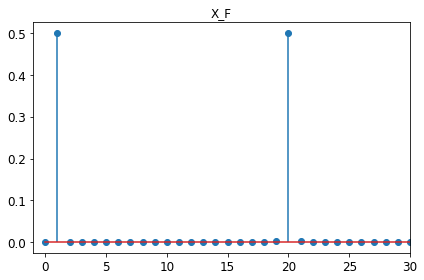

In [12]:
# X_F
plt.title("X_F")
plt.xlim(-1,30)
plt.stem(X_f_abs)
save_fig("X_F")

그림 저장: X_wn_f_abs


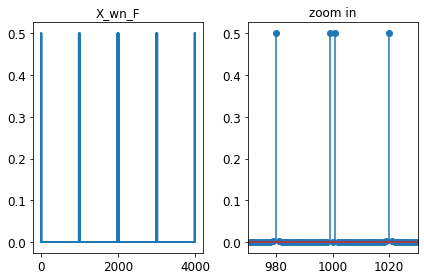

In [13]:
#white noise X_f
X_wn_f = [Ck(k,x_with_wn) for k in range(x_split * x_show)]
X_wn_f_abs = [abs(X_wn_f[data]) for data in range(x_split * x_show)]
plt.subplot(1,2,1)
plt.title("X_wn_F")
plt.plot(X_wn_f_abs)

plt.subplot(1,2,2)
plt.title("zoom in")
plt.xlim(970,1030)
plt.stem(X_wn_f_abs)
save_fig("X_wn_f_abs")

그림 저장: ideal_H_f


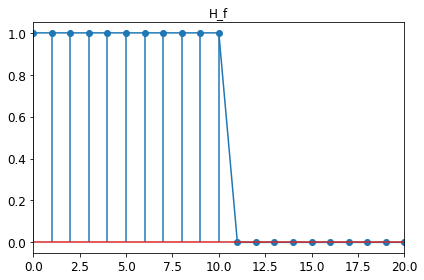

In [14]:
# H(f) 필터 설계 (Rectangular Pulse)
filter_hz = 10
fliter_x = [1 if (i <= filter_hz) else 0 for i in range(x_split * x_show)]

plt.title("H_f")
plt.xlim(0,20)
plt.plot(fliter_x)
plt.stem(fliter_x)
save_fig("ideal_H_f")

In [15]:
#공통 차수
degree = [1, 5, 10, 25, 59]
cutoff = 10

# Butterworth filter
butterworth_filter = {
    '1d' : [ (1/ (1 + (2*np.pi * i / (2*np.pi * cutoff))**(2 * degree[0]) )**0.5) for i in range(x_split * x_show)],
    '5d' : [ (1/ (1 + (2*np.pi * i / (2*np.pi * cutoff))**(2 * degree[1]) )**0.5) for i in range(x_split * x_show)],
    '10d' : [ (1/ (1 + (2*np.pi * i / (2*np.pi * cutoff))**(2 * degree[2]) )**0.5) for i in range(x_split * x_show)],
    '25d' : [ (1/ (1 + (2*np.pi * i / (2*np.pi * cutoff))**(2 * degree[3]) )**0.5) for i in range(x_split * x_show)],
    '59d' : [ (1/ (1 + (2*np.pi * i / (2*np.pi * cutoff))**(2 * degree[4]) )**0.5) for i in range(x_split * x_show)]
}

0.7071067811865475
그림 저장: butterworth_1d_H_F


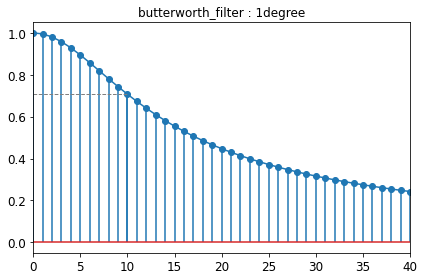

In [17]:
plt.xlim(0, 40)
plt.title("butterworth_filter : 1degree")
plt.plot(butterworth_filter['1d'])
plt.stem(butterworth_filter['1d'])
plt.vlines(10, 0, butterworth_filter['1d'][10])
plt.axhline(butterworth_filter['1d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='1')
print(butterworth_filter['1d'][10])
save_fig("butterworth_1d_H_F")

0.7071067811865475
그림 저장: butterworth_5d_H_F


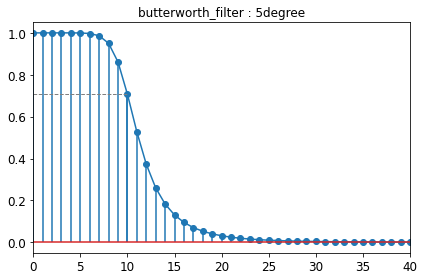

In [18]:
plt.xlim(0, 40)
plt.title("butterworth_filter : 5degree")
plt.plot(butterworth_filter['5d'])
plt.stem(butterworth_filter['5d'])
plt.vlines(10, 0, butterworth_filter['5d'][10])
plt.axhline(butterworth_filter['5d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='1')
print(butterworth_filter['5d'][10])
save_fig("butterworth_5d_H_F")

0.7071067811865475
그림 저장: butterworth_10d_H_F


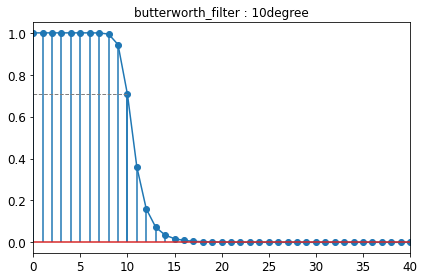

In [19]:
plt.xlim(0, 40)
plt.title("butterworth_filter : 10degree")
plt.plot(butterworth_filter['10d'])
plt.stem(butterworth_filter['10d'])
plt.vlines(10, 0, butterworth_filter['10d'][10])
plt.axhline(butterworth_filter['10d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='1')
print(butterworth_filter['10d'][10])
save_fig("butterworth_10d_H_F")

0.7071067811865475
그림 저장: butterworth_25d_H_F


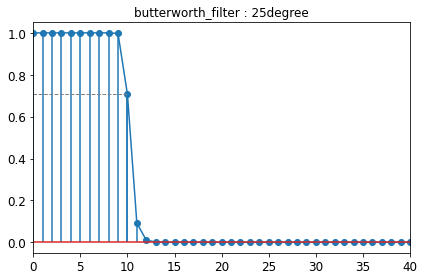

In [20]:
plt.xlim(0, 40)
plt.title("butterworth_filter : 25degree")
plt.plot(butterworth_filter['25d'])
plt.stem(butterworth_filter['25d'])
plt.vlines(10, 0, butterworth_filter['25d'][10])
plt.axhline(butterworth_filter['25d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='1')
print(butterworth_filter['25d'][10])
save_fig("butterworth_25d_H_F")

0.7071067811865475
그림 저장: butterworth_59d_H_F


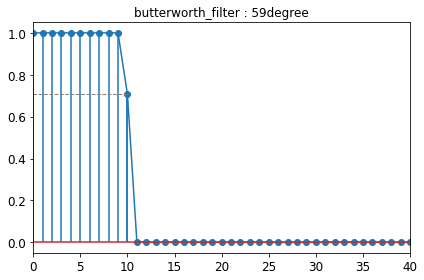

In [21]:
plt.xlim(0, 40)
plt.title("butterworth_filter : 59degree")
plt.plot(butterworth_filter['59d'])
plt.stem(butterworth_filter['59d'])
plt.vlines(10, 0, butterworth_filter['59d'][10])
plt.axhline(butterworth_filter['59d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='1')
print(butterworth_filter['59d'][10])
save_fig("butterworth_59d_H_F")

그림 저장: butterworth_H_f_all


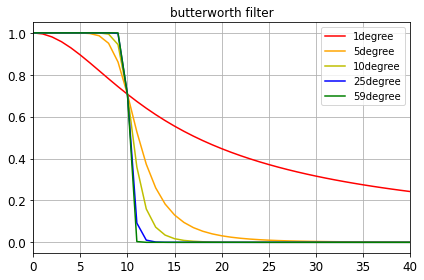

In [22]:
# all of chebyshev_filter
plt.xlim(0,40)
plt.grid()
plt.title("butterworth filter")
plt.plot(butterworth_filter['1d'], 'r', label="1degree")
plt.plot(butterworth_filter['5d'], 'orange', label="5degree")
plt.plot(butterworth_filter['10d'], 'y', label="10degree")
plt.plot(butterworth_filter['25d'], 'b', label="25degree")
plt.plot(butterworth_filter['59d'], 'g', label="59degree")
plt.legend(loc="upper right", fontsize=10)
save_fig("butterworth_H_f_all")

In [23]:
# chebyshev filter 
Is = 0.3

def cheb_cos(i, deg):
    return (1/ (1 + Is**2 * np.cos(deg * np.arccos((2*np.pi * i / (2*np.pi *cutoff))**2)))**0.5)

def cheb_cosh(i, deg):
    return (1/ (1 + Is**2 * np.cosh(deg * np.arccosh((2*np.pi * i / (2*np.pi *cutoff))**2)))**0.5)
    
chebyshev_filter = {
    '1d' : [ cheb_cos(i,degree[0]) if abs(i) <=10 else cheb_cosh(i,degree[0]) for i in range(x_split * x_show)],
    '5d' : [ cheb_cos(i,degree[1]) if abs(i) <=10 else cheb_cosh(i,degree[1]) for i in range(x_split * x_show)],
    '10d' : [ cheb_cos(i,degree[2]) if abs(i) <=10 else cheb_cosh(i,degree[2]) for i in range(x_split * x_show)],
    '25d' : [ cheb_cos(i,degree[3]) if abs(i) <=10 else cheb_cosh(i,degree[3]) for i in range(x_split * x_show)],
    '59d' : [ cheb_cos(i,degree[4]) if abs(i) <=10 else cheb_cosh(i,degree[4]) for i in range(x_split * x_show)]
}

<ipython-input-23-0229261d7090>:8: RuntimeWarning: overflow encountered in cosh
  return (1/ (1 + Is**2 * np.cosh(deg * np.arccosh((2*np.pi * i / (2*np.pi *cutoff))**2)))**0.5)


0.9578262852211513
그림 저장: chebyshev_1d_H_f


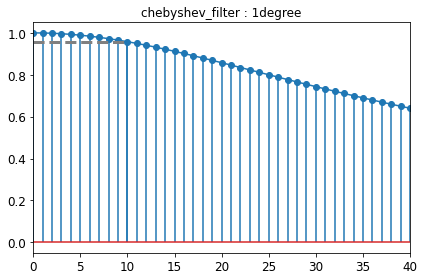

In [24]:
plt.xlim(0, 40)
plt.title("chebyshev_filter : 1degree")
plt.plot(chebyshev_filter['1d'])
plt.stem(chebyshev_filter['1d'])
plt.vlines(10, 0, chebyshev_filter['1d'][10])
plt.axhline(chebyshev_filter['1d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='3')
print(chebyshev_filter['1d'][10])
save_fig("chebyshev_1d_H_f")

0.9578262852211513
그림 저장: chebyshev_5d_H_f


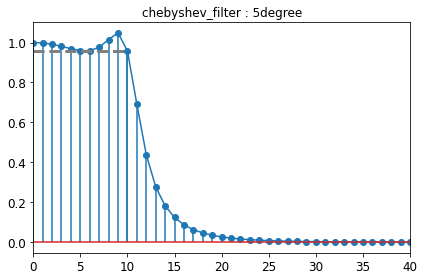

In [25]:
plt.xlim(0, 40)
plt.title("chebyshev_filter : 5degree")
plt.plot(chebyshev_filter['5d'])
plt.stem(chebyshev_filter['5d'])
plt.vlines(10, 0, chebyshev_filter['5d'][10])
plt.axhline(chebyshev_filter['5d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='3')
print(chebyshev_filter['5d'][10])
save_fig("chebyshev_5d_H_f")

0.9578262852211513
그림 저장: chebyshev_10d_H_f


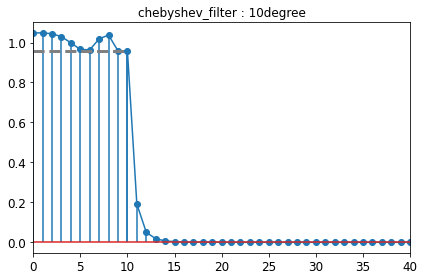

In [26]:
plt.xlim(0, 40)
plt.title("chebyshev_filter : 10degree")
plt.plot(chebyshev_filter['10d'])
plt.stem(chebyshev_filter['10d'])
plt.vlines(10, 0, chebyshev_filter['10d'][10])
plt.axhline(chebyshev_filter['10d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='3')
print(chebyshev_filter['10d'][10])
save_fig("chebyshev_10d_H_f")

0.9578262852211513
그림 저장: chebyshev_25d_H_f


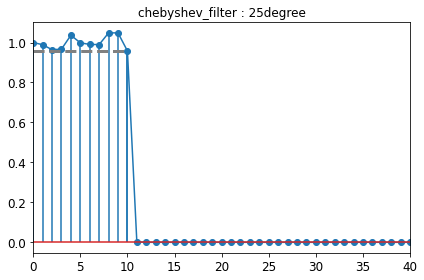

In [27]:
plt.xlim(0, 40)
plt.title("chebyshev_filter : 25degree")
plt.plot(chebyshev_filter['25d'])
plt.stem(chebyshev_filter['25d'])
plt.vlines(10, 0, chebyshev_filter['25d'][10])
plt.axhline(chebyshev_filter['25d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='3')
print(chebyshev_filter['25d'][10])
save_fig("chebyshev_25d_H_f")

0.9578262852211513
그림 저장: chebyshev_59d_H_f


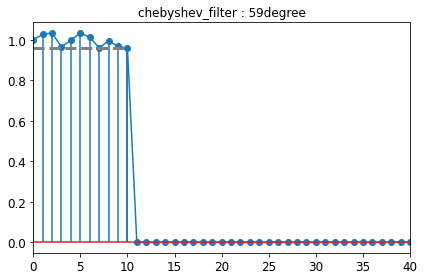

In [28]:
plt.xlim(0, 40)
plt.title("chebyshev_filter : 59degree")
plt.plot(chebyshev_filter['59d'])
plt.stem(chebyshev_filter['59d'])
plt.vlines(10, 0, chebyshev_filter['59d'][10])
plt.axhline(chebyshev_filter['59d'][10], 0, 10/40, color='gray', linestyle='--', linewidth='3')
print(chebyshev_filter['59d'][10])
save_fig("chebyshev_59d_H_f")

그림 저장: chebyshev_H_f_all


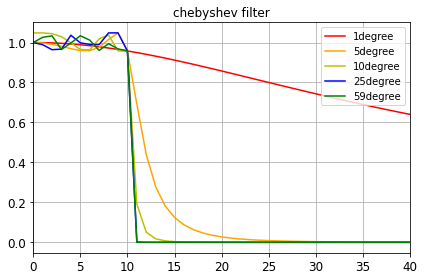

In [29]:
# all of chebyshev_filter
plt.xlim(0,40)
plt.grid()
plt.title("chebyshev filter")
plt.plot(chebyshev_filter['1d'], 'r', label="1degree")
plt.plot(chebyshev_filter['5d'], 'orange', label="5degree")
plt.plot(chebyshev_filter['10d'], 'y', label="10degree")
plt.plot(chebyshev_filter['25d'], 'b', label="25degree")
plt.plot(chebyshev_filter['59d'], 'g', label="59degree")
plt.legend(loc="upper right", fontsize=10)
save_fig("chebyshev_H_f_all")

그림 저장: ideal_Y_f


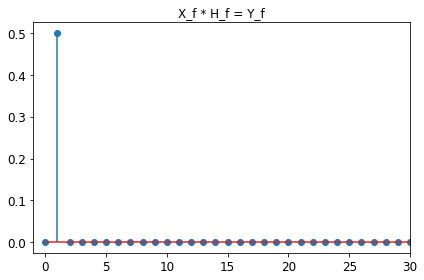

In [31]:
# Y(f)
result = [X_f_abs[i] * fliter_x[i] for i in range(x_split * x_show)]

plt.title("X_f * H_f = Y_f")
plt.xlim(-1,30)
plt.stem(result)
save_fig("ideal_Y_f")

In [33]:
# white noise Y(f)
result_wn_butter = {
    '1d' : [X_f_abs[i] * butterworth_filter['1d'][i] for i in range(x_split * x_show)],
    '25d' : [X_wn_f_abs[i] * butterworth_filter['25d'][i] for i in range(x_split * x_show)]
}
result_wn_chev = {
    '1d' : [X_f_abs[i] * chebyshev_filter['1d'][i] for i in range(x_split * x_show)],
    '25d' : [X_wn_f_abs[i] * chebyshev_filter['25d'][i] for i in range(x_split * x_show)]
}

그림 저장: wn 1degree


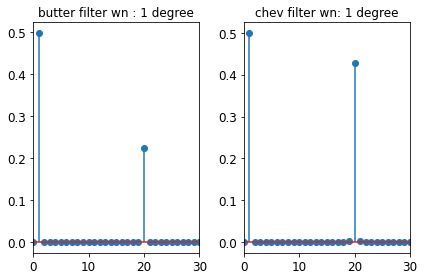

In [35]:
plt.subplot(1,2,1)
plt.xlim(0,30)
plt.title("butter filter wn : 1 degree")
plt.stem(result_wn_butter['1d'])

plt.subplot(1,2,2)
plt.xlim(0,30)
plt.title("chev filter wn: 1 degree")
plt.stem(result_wn_chev['1d'])
save_fig("wn 1degree")

그림 저장: wn 25degree


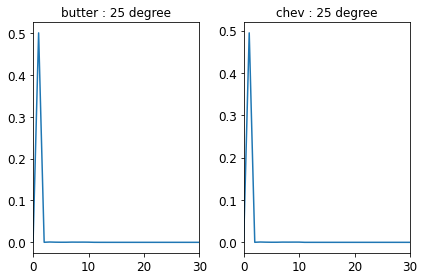

In [36]:
plt.subplot(1,2,1)
plt.xlim(0,30)
plt.title("butter : 25 degree")
plt.plot(result_wn_butter['25d'])

plt.subplot(1,2,2)
plt.xlim(0,30)
plt.title("chev : 25 degree")
plt.plot(result_wn_chev['25d'])
save_fig("wn 25degree")

In [37]:
#butterworth filter Y(f)
result_butterworth_Y_f = {
    '1d' : [X_f_abs[i] * butterworth_filter['1d'][i] for i in range(x_split * x_show)],
    '5d' : [X_f_abs[i] * butterworth_filter['5d'][i] for i in range(x_split * x_show)],
    '10d' : [X_f_abs[i] * butterworth_filter['10d'][i] for i in range(x_split * x_show)],
    '25d' : [X_f_abs[i] * butterworth_filter['25d'][i] for i in range(x_split * x_show)],
    '59d' : [X_f_abs[i] * butterworth_filter['59d'][i] for i in range(x_split * x_show)]
}

그림 저장: butterworth_1d_Y_f


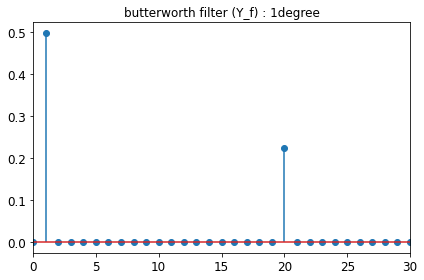

In [38]:
plt.title("butterworth filter (Y_f) : 1degree")
plt.xlim(0,30)
plt.stem(result_butterworth_Y_f['1d'])
save_fig("butterworth_1d_Y_f")

그림 저장: butterworth_5d_Y_f


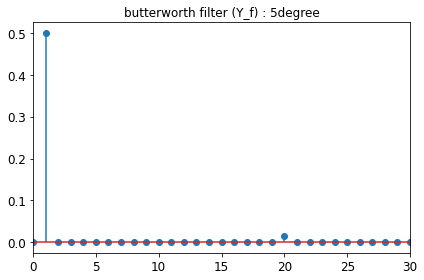

In [40]:
plt.title("butterworth filter (Y_f) : 5degree")
plt.xlim(0,30)
plt.stem(result_butterworth_Y_f['5d'])
save_fig("butterworth_5d_Y_f")

그림 저장: butterworth_10d_Y_f


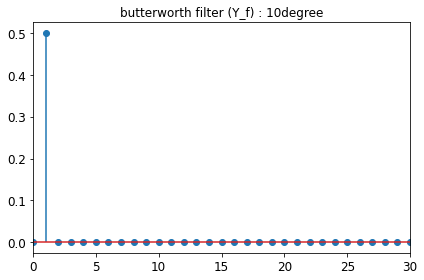

In [41]:
plt.title("butterworth filter (Y_f) : 10degree")
plt.xlim(0,30)
plt.stem(result_butterworth_Y_f['10d'])
save_fig("butterworth_10d_Y_f")

그림 저장: butterworth_25d_Y_f


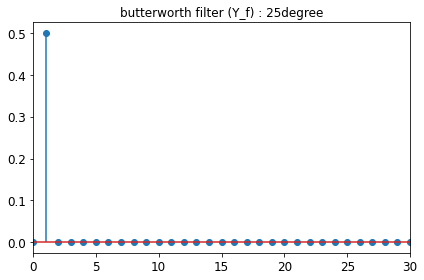

In [42]:
plt.title("butterworth filter (Y_f) : 25degree")
plt.xlim(0,30)
plt.stem(result_butterworth_Y_f['25d'])
save_fig("butterworth_25d_Y_f")

그림 저장: butterworth_59d_Y_f


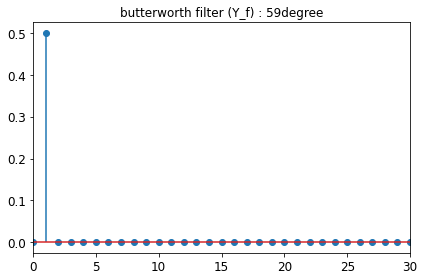

In [43]:
plt.title("butterworth filter (Y_f) : 59degree")
plt.xlim(0,30)
plt.stem(result_butterworth_Y_f['59d'])
save_fig("butterworth_59d_Y_f")

In [44]:
# chebyshev_filter Y(f)
result_chebyshev_Y_f = {
    '1d' : [X_f_abs[i] * chebyshev_filter['1d'][i] for i in range(x_split * x_show)],
    '5d' : [X_f_abs[i] * chebyshev_filter['5d'][i] for i in range(x_split * x_show)],
    '10d' : [X_f_abs[i] * chebyshev_filter['10d'][i] for i in range(x_split * x_show)],
    '25d' : [X_f_abs[i] * chebyshev_filter['25d'][i] for i in range(x_split * x_show)],
    '59d' : [X_f_abs[i] * chebyshev_filter['59d'][i] for i in range(x_split * x_show)]
}

그림 저장: chebyshev_1d_Y_f


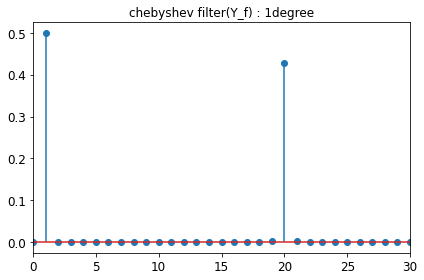

In [46]:
plt.title("chebyshev filter(Y_f) : 1degree")
plt.xlim(0,30)
plt.stem(result_chebyshev_Y_f['1d'])
save_fig("chebyshev_1d_Y_f")

그림 저장: chebyshev_5_Y_f


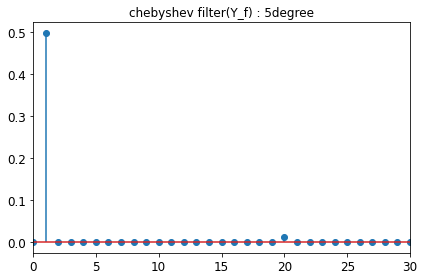

In [49]:
plt.title("chebyshev filter(Y_f) : 5degree")
plt.xlim(0,30)
plt.stem(result_chebyshev_Y_f['5d'])
save_fig("chebyshev_5_Y_f")

그림 저장: chebyshev_10d_Y_f


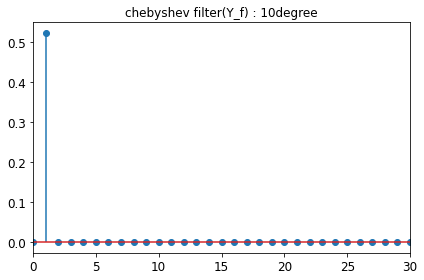

In [50]:
plt.title("chebyshev filter(Y_f) : 10degree")
plt.xlim(0,30)
plt.stem(result_chebyshev_Y_f['10d'])
save_fig("chebyshev_10d_Y_f")

그림 저장: chebyshev_25d_Y_f


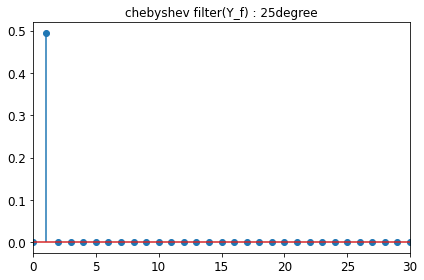

In [51]:
plt.title("chebyshev filter(Y_f) : 25degree")
plt.xlim(0,30)
plt.stem(result_chebyshev_Y_f['25d'])
save_fig("chebyshev_25d_Y_f")

그림 저장: chebyshev_59d_Y_f


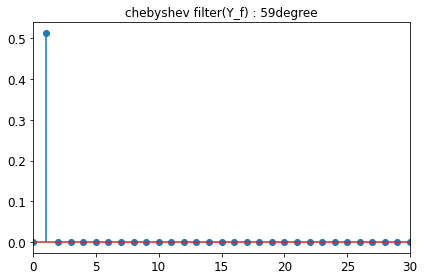

In [52]:
plt.title("chebyshev filter(Y_f) : 59degree")
plt.xlim(0,30)
plt.stem(result_chebyshev_Y_f['59d'])
save_fig("chebyshev_59d_Y_f")

그림 저장: ideal_h_n


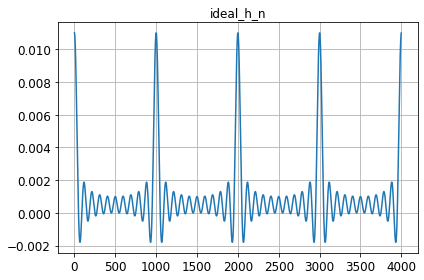

In [54]:
# inverse Fourier  
def inverse_Ck(k):
    c = [fliter_x[index]*np.exp(1j * 2 * np.pi * k * index / x_split) for index in range(x_split * x_show)]
    return sum(c) / x_split

h_n = [inverse_Ck(k) for k in range(x_split * x_show)]

plt.title("ideal_h_n")
plt.grid()
plt.plot(h_n)
save_fig("ideal_h_n")

In [55]:
def inverse_butterworth_Ck(k, id):
    c = [butterworth_filter[id][index]*np.exp(1j * 2 * np.pi * k * index / x_split) for index in range(x_split * x_show)]
    return sum(c) / x_split

h_n_butterworth = {
    '1d' : [inverse_butterworth_Ck(k, '1d') for k in range(x_split * x_show)],
    '5d' : [inverse_butterworth_Ck(k, '5d') for k in range(x_split * x_show)],
    '10d' : [inverse_butterworth_Ck(k, '10d') for k in range(x_split * x_show)],
    '25d' : [inverse_butterworth_Ck(k, '25d') for k in range(x_split * x_show)],
    '59d' : [inverse_butterworth_Ck(k, '59d') for k in range(x_split * x_show)],
}

그림 저장: h_n_butterworth_1d


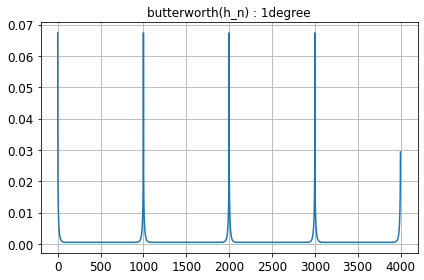

In [56]:
plt.title("butterworth(h_n) : 1degree")
plt.grid()
plt.plot(h_n_butterworth['1d'])
save_fig("h_n_butterworth_1d")

그림 저장: h_n_butterworth_5d


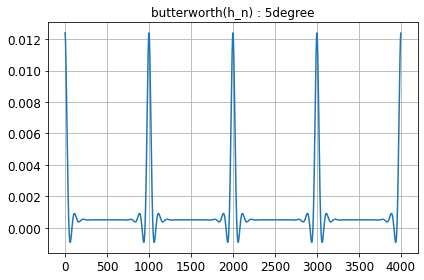

In [57]:
plt.title("butterworth(h_n) : 5degree")
plt.grid()
plt.plot(h_n_butterworth['5d'])
save_fig("h_n_butterworth_5d")

그림 저장: h_n_butterworth_10d


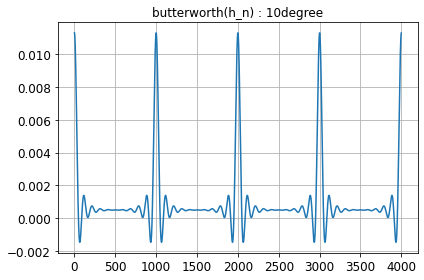

In [58]:
plt.title("butterworth(h_n) : 10degree")
plt.grid()
plt.plot(h_n_butterworth['10d'])
save_fig("h_n_butterworth_10d")

그림 저장: h_n_butterworth_25d


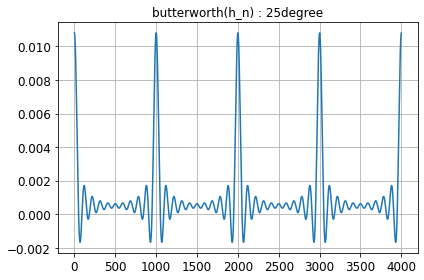

In [59]:
plt.title("butterworth(h_n) : 25degree")
plt.grid()
plt.plot(h_n_butterworth['25d'])
save_fig("h_n_butterworth_25d")

그림 저장: h_n_butterworth_59d


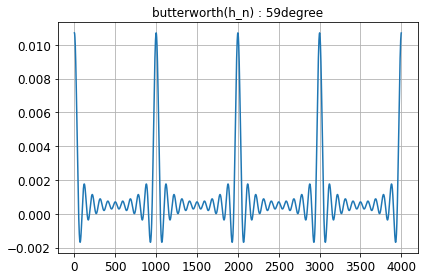

In [60]:
plt.title("butterworth(h_n) : 59degree")
plt.grid()
plt.plot(h_n_butterworth['59d'])
save_fig("h_n_butterworth_59d")

In [66]:
def inverse_chebyshev_Ck(k, id):
    c = [chebyshev_filter[id][index]*np.exp(1j * 2 * np.pi * k * index / x_split) for index in range(x_split * x_show)]
    return sum(c) / x_split

h_n_chebyshev = {
    '1d' : [inverse_chebyshev_Ck(k,'1d') for k in range(x_split * x_show)],
    '5d' : [inverse_chebyshev_Ck(k,'5d') for k in range(x_split * x_show)],
    '10d' : [inverse_chebyshev_Ck(k,'10d') for k in range(x_split * x_show)],
    '25d' : [inverse_chebyshev_Ck(k,'25d') for k in range(x_split * x_show)],
    '59d' : [inverse_chebyshev_Ck(k,'59d') for k in range(x_split * x_show)]
}

그림 저장: h_n_butterworth_1d


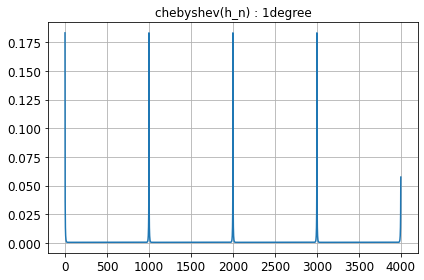

In [67]:
plt.title("chebyshev(h_n) : 1degree")
plt.grid()
plt.plot(h_n_chebyshev['1d'])
save_fig("h_n_butterworth_1d")

그림 저장: h_n_butterworth_5d


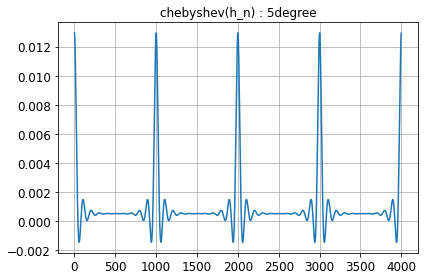

In [68]:
plt.title("chebyshev(h_n) : 5degree")
plt.grid()
plt.plot(h_n_chebyshev['5d'])
save_fig("h_n_butterworth_5d")

그림 저장: h_n_butterworth_10d


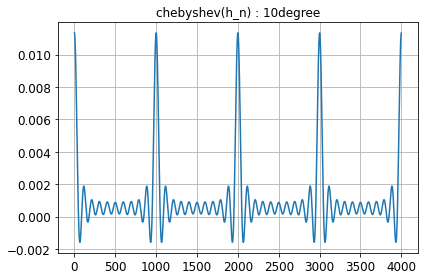

In [69]:
plt.title("chebyshev(h_n) : 10degree")
plt.grid()
plt.plot(h_n_chebyshev['10d'])
save_fig("h_n_butterworth_10d")

그림 저장: h_n_butterworth_25d


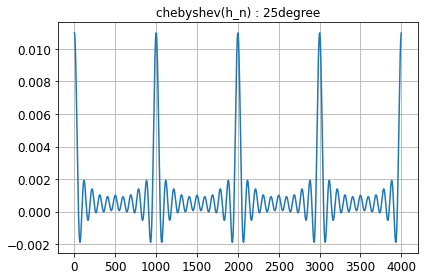

In [70]:
plt.title("chebyshev(h_n) : 25degree")
plt.grid()
plt.plot(h_n_chebyshev['25d'])
save_fig("h_n_butterworth_25d")

그림 저장: h_n_butterworth_59d


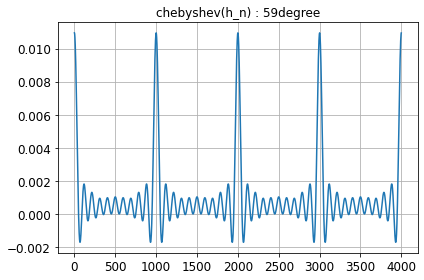

In [71]:
plt.title("chebyshev(h_n) : 59degree")
plt.grid()
plt.plot(h_n_chebyshev['59d'])
save_fig("h_n_butterworth_59d")

그림 저장: ideal_y_n


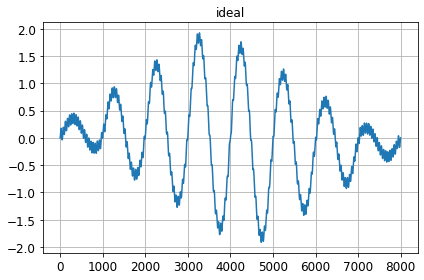

In [73]:
conv_y = []
for index in range(len(x_sum_120)+len(h_n) - 1):
    add = 0
    if index >= len(x_sum_120):
        for i in reversed(range(len(x_sum_120))):
            if index-i >= len(x_sum_120):
                break
            add += x_sum_120[i] * h_n[index-i]
    else:
        for i in reversed(range(index+1)):
            add += x_sum_120[i] * h_n[index-i]
    conv_y.append(add)
plt.title("ideal")
plt.grid()  
plt.plot(conv_y)
save_fig("ideal_y_n")

In [76]:
#butterworth
def convol(data):
    result = []
    for index in range(len(x_sum_120)+len(data) - 1):
        add = 0
        if index >= len(x_sum_120):
            for i in reversed(range(len(x_sum_120))):
                if index-i >= len(x_sum_120):
                    break
                add += x_sum_120[i] * data[index-i]
        else:
            for i in reversed(range(index+1)):
                add += x_sum_120[i] * data[index-i]
        result.append(add)
    return result

butterworth_y = [convol(data) for data in h_n_butterworth.values()]

그림 저장: butterworth_y_n_1d


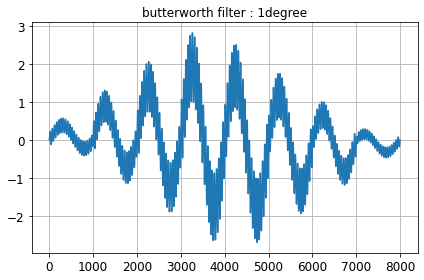

In [77]:
plt.title("butterworth filter : 1degree")
plt.grid()  
plt.plot(butterworth_y[0])
save_fig("butterworth_y_n_1d")

그림 저장: butterworth_y_n_5d


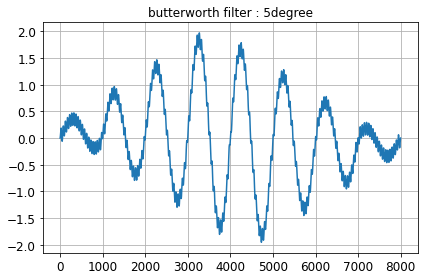

In [78]:
plt.title("butterworth filter : 5degree")
plt.grid()  
plt.plot(butterworth_y[1])
save_fig("butterworth_y_n_5d")

그림 저장: butterworth_y_n_10d


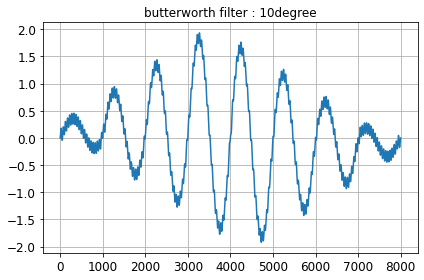

In [79]:
plt.title("butterworth filter : 10degree")
plt.grid()  
plt.plot(butterworth_y[2])
save_fig("butterworth_y_n_10d")

그림 저장: butterworth_y_n_25d


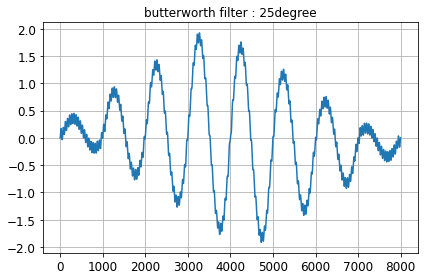

In [80]:
plt.title("butterworth filter : 25degree")
plt.grid()  
plt.plot(butterworth_y[3])
save_fig("butterworth_y_n_25d")

그림 저장: butterworth_y_n_59d


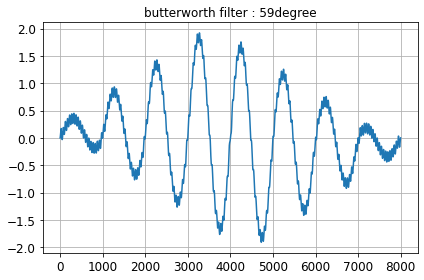

In [81]:
plt.title("butterworth filter : 59degree")
plt.grid()  
plt.plot(butterworth_y[4])
save_fig("butterworth_y_n_59d")

그림 저장: butterworth_y_n_all


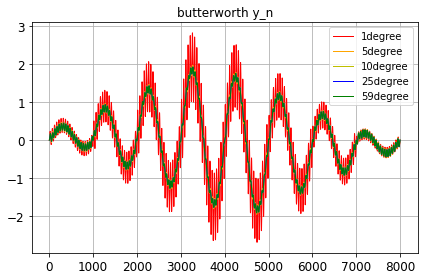

In [91]:
# all of butterworth_yn
plt.grid()
plt.title("butterworth y_n")
plt.plot(butterworth_y[0], 'r', label="1degree", linewidth='1')
plt.plot(butterworth_y[1], 'orange', label="5degree", linewidth='1')
plt.plot(butterworth_y[2], 'y', label="10degree", linewidth='1')
plt.plot(butterworth_y[3], 'b', label="25degree", linewidth='1')
plt.plot(butterworth_y[4], 'g', label="59degree", linewidth='1')
plt.legend(loc="upper right", fontsize=10)

save_fig("butterworth_y_n_all")

In [83]:
chebyshev_y = [convol(data) for data in h_n_chebyshev.values()]

그림 저장: chebyshev_y_n_1d


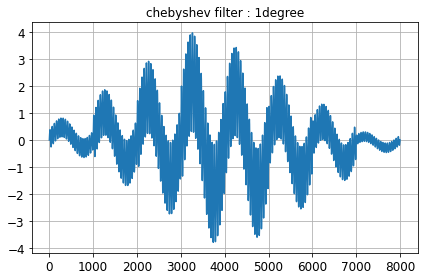

In [84]:
plt.title("chebyshev filter : 1degree")
plt.grid()  
plt.plot(chebyshev_y[0])
save_fig("chebyshev_y_n_1d")

그림 저장: chebyshev_y_n_5d


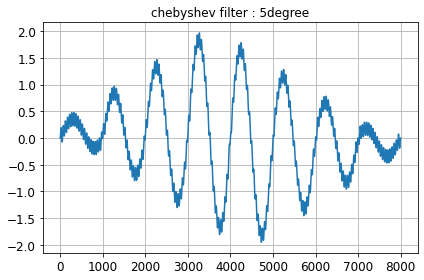

In [85]:
plt.title("chebyshev filter : 5degree")
plt.grid()  
plt.plot(chebyshev_y[1])
save_fig("chebyshev_y_n_5d")

그림 저장: chebyshev_y_n_10d


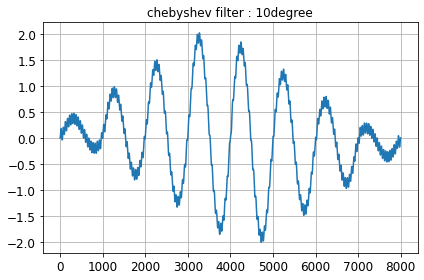

In [86]:
plt.title("chebyshev filter : 10degree")
plt.grid()  
plt.plot(chebyshev_y[2])
save_fig("chebyshev_y_n_10d")

그림 저장: chebyshev_y_n_25d


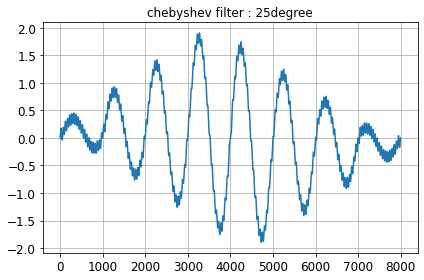

In [88]:
plt.title("chebyshev filter : 25degree")
plt.grid()  
plt.plot(chebyshev_y[3])
save_fig("chebyshev_y_n_25d")

그림 저장: chebyshev_y_n_59d


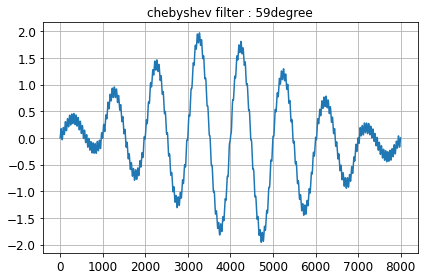

In [89]:
plt.title("chebyshev filter : 59degree")
plt.grid()  
plt.plot(chebyshev_y[4])
save_fig("chebyshev_y_n_59d")

그림 저장: chebyshev_y_n_all


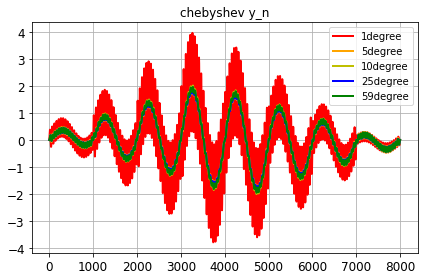

In [92]:
# all of butterworth_yn
plt.grid()
plt.title("chebyshev y_n")
plt.plot(chebyshev_y[0], 'r', label="1degree", linewidth='2')
plt.plot(chebyshev_y[1], 'orange', label="5degree", linewidth='2')
plt.plot(chebyshev_y[2], 'y', label="10degree", linewidth='2')
plt.plot(chebyshev_y[3], 'b', label="25degree", linewidth='2')
plt.plot(chebyshev_y[4], 'g', label="59degree", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("chebyshev_y_n_all")

그림 저장: cheby&butter&ideal_1d


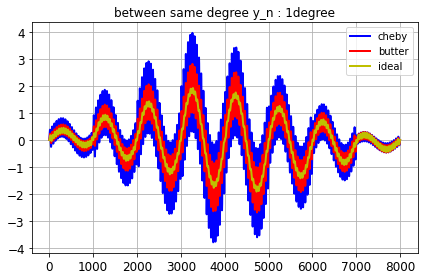

In [94]:
# all of butterworth_yn
plt.grid()
plt.title("between same degree y_n : 1degree")
plt.plot(chebyshev_y[0], 'b', label="cheby", linewidth='2')
plt.plot(butterworth_y[0], 'r', label="butter", linewidth='2')
plt.plot(conv_y, 'y', label="ideal", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("cheby&butter&ideal_1d")

그림 저장: cheby&butter&ideal_5d


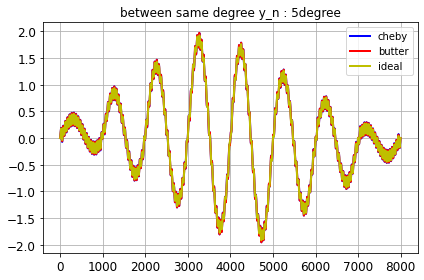

In [95]:
plt.grid()
plt.title("between same degree y_n : 5degree")
plt.plot(chebyshev_y[1], 'b', label="cheby", linewidth='2')
plt.plot(butterworth_y[1], 'r', label="butter", linewidth='2')
plt.plot(conv_y, 'y', label="ideal", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("cheby&butter&ideal_5d")

그림 저장: cheby&butter&ideal_10d


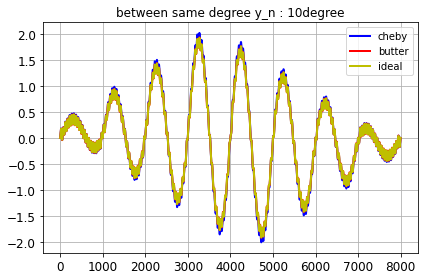

In [96]:
plt.grid()
plt.title("between same degree y_n : 10degree")
plt.plot(chebyshev_y[2], 'b', label="cheby", linewidth='2')
plt.plot(butterworth_y[2], 'r', label="butter", linewidth='2')
plt.plot(conv_y, 'y', label="ideal", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("cheby&butter&ideal_10d")

그림 저장: cheby&butter&ideal_25d


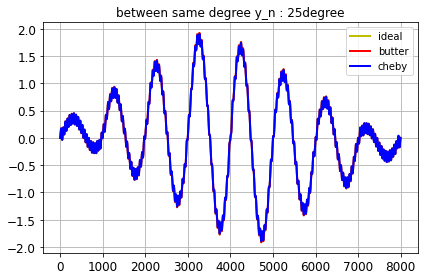

In [97]:
plt.grid()
plt.title("between same degree y_n : 25degree")
plt.plot(conv_y, 'y', label="ideal", linewidth='2')
plt.plot(butterworth_y[3], 'r', label="butter", linewidth='2')
plt.plot(chebyshev_y[3], 'b', label="cheby", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("cheby&butter&ideal_25d")

그림 저장: cheby&butter&ideal_59d


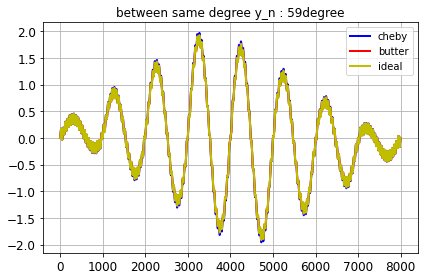

In [98]:
plt.grid()
plt.title("between same degree y_n : 59degree")
plt.plot(chebyshev_y[4], 'b', label="cheby", linewidth='2')
plt.plot(butterworth_y[4], 'r', label="butter", linewidth='2')
plt.plot(conv_y, 'y', label="ideal", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("cheby&butter&ideal_59d")

In [102]:
#white noise
def wn_convol(data):
    result = []
    for index in range(len(x_with_wn)+len(data) - 1):
        add = 0
        if index >= len(x_with_wn):
            for i in reversed(range(len(x_with_wn))):
                if index-i >= len(x_with_wn):
                    break
                add += x_with_wn[i] * data[index-i]
        else:
            for i in reversed(range(index+1)):
                add += x_with_wn[i] * data[index-i]
        result.append(add)
    return result

h_n_wn_butterworth = {}
h_n_wn_chebyshev = {}
for i in ['1d', '25d']:
    h_n_wn_butterworth[i] = h_n_butterworth[i]
    h_n_wn_chebyshev[i] = h_n_chebyshev[i]

In [103]:
wn_butter = [wn_convol(data) for data in h_n_wn_butterworth.values()]
wn_chev = [wn_convol(data) for data in h_n_wn_chebyshev.values()]

그림 저장: butterworth_wn_y


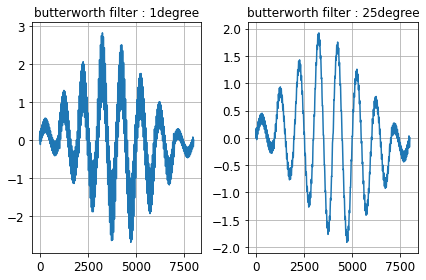

In [105]:
plt.subplot(1,2,1)
plt.title("butterworth filter : 1degree")
plt.grid()  
plt.plot(wn_butter[0])

plt.subplot(1,2,2)
plt.title("butterworth filter : 25degree")
plt.grid()  
plt.plot(wn_butter[1])

save_fig("butterworth_wn_y")

그림 저장: chebyshev_wn_y


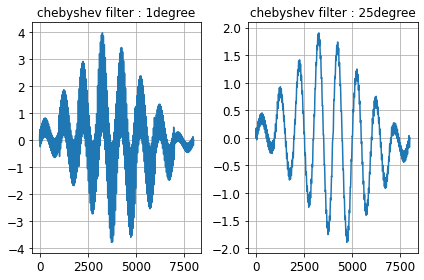

In [106]:
plt.subplot(1,2,1)
plt.title("chebyshev filter : 1degree")
plt.grid()  
plt.plot(wn_chev[0])

plt.subplot(1,2,2)
plt.title("chebyshev filter : 25degree")
plt.grid()  
plt.plot(wn_chev[1])

save_fig("chebyshev_wn_y")

그림 저장: butter_wn_y


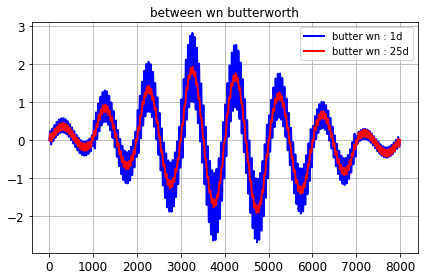

In [107]:
plt.grid()
plt.title("between wn butterworth")

plt.plot(wn_butter[0], 'b', label="butter wn : 1d", linewidth='2')
plt.plot(wn_butter[1], 'r', label="butter wn : 25d", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("butter_wn_y")

그림 저장: chebyshev_wn_y


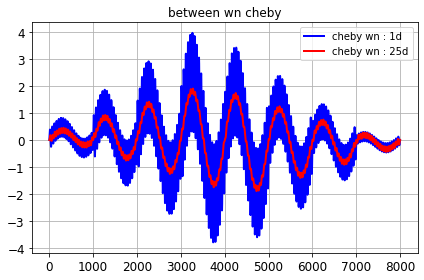

In [108]:
plt.grid()
plt.title("between wn cheby")

plt.plot(wn_chev[0], 'b', label="cheby wn : 1d", linewidth='2')
plt.plot(wn_chev[1], 'r', label="cheby wn : 25d", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("chebyshev_wn_y")

그림 저장: butterworth_two_y


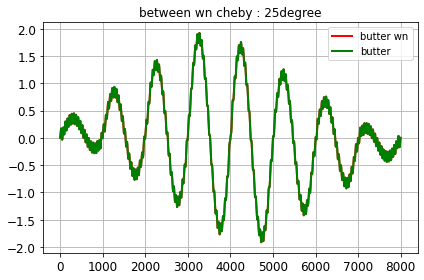

In [109]:
plt.grid()
plt.title("between wn cheby : 25degree")

plt.plot(wn_butter[1], 'r', label="butter wn", linewidth='2')
plt.plot(butterworth_y[3], 'g', label="butter", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("butterworth_two_y")

그림 저장: chebyshev_two_y


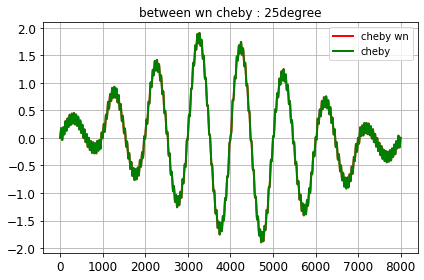

In [110]:
plt.grid()
plt.title("between wn cheby : 25degree")

plt.plot(wn_chev[1], 'r', label="cheby wn", linewidth='2')
plt.plot(chebyshev_y[3], 'g', label="cheby", linewidth='2')
plt.legend(loc="upper right", fontsize=10)

save_fig("chebyshev_two_y")